# Week3授業課題　信用情報を分析しよう

1.この課題の目的
実データに近いものの分析を行う
データセットに対して自ら課題を設定できるようにする
以下の要件をすべて満たしていた場合、合格とします。

※Jupyter Notebookを使い課題に沿った検証や説明ができている。

2.信用情報
Kaggleの Home Credit Default Risk コンペティションを活用し、実データに近いものに対し、自ら課題を設定して分析する練習を行います。

## 【問題1】コンペティション内容の把握

以下の観点に気をつけて、どのようなコンペティションなのかレポートしてください。

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df_application = pd.read_csv("application_train.csv")

●このコンペティションでは何を予測する？

➡︎住宅ローン借入れ希望者の返済能力。

●目的変数は？

➡︎返済できる(0)orできない（1）

●企業がこのコンペティションを開催することで得られるメリットは？

➡︎住宅ローン借入れ希望者の返済能力を適切に判断できるようになる
（＝回収できる顧客に融資し、回収できない顧客には融資しないという判断をより正確に行えるようになるため、金融機関の資産をより安定的に運用できるようになる）

●データセットを見る前の段階で考えられる予測結果に影響してきそうなことは？

➡︎借入希望者の収入、年齢、性別、家族構成、借入希望額、貯蓄額、保有資産、病歴

## 【問題2】データの概観

データの概観を把握してください。コードと表・グラフだけではなく、結果に対する説明や考察も行ってください。

●.head()、.info()、describe()などを使う

In [3]:
#【外観把握①】 5番目までのラベルを確認
df_application.head()
#特徴量は１２２種類。データはint、float、strが混在している。欠損値もある。

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#【外観把握②】 5番目までのラベルを確認
df_application.info()
#indexは307511個

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
#【外観把握③】 データの分布を確認
df_application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [ ]:
#【外観把握④】 特徴量の定義を確認

In [ ]:
テーブル、行、説明、特別
1、application_ {train | test} .csv、SK_ID_CURR、サンプルのローンID、
2、application_ {train | test} .csv、TARGET、 "ターゲット変数（1  - 支払いが困難なクライアント：サンプルの最初のY個のローンのうちの少なくとも1つにX日以上支払いが遅れています。 0  - 他のすべての場合） "、
5、application_ {train | test} .csv、NAME_CONTRACT_TYPE、ローンが現金または回転中の場合は識別、
6、application_ {train | test} .csv、CODE_GENDER、クライアントの性別、
7、application_ {train | test} .csv、FLAG_OWN_CAR、クライアントが車を所有している場合はフラグ、
8、application_ {train | test} .csv、FLAG_OWN_REALTY、クライアントが家またはアパートを所有している場合はフラグ、
9、application_ {train | test} .csv、CNT_CHILDREN、クライアントの子の数、
10、application_ {train | test} .csv、AMT_INCOME_TOTAL、クライアントの収入、
11、application_ {train | test} .csv、AMT_CREDIT、ローンの貸方、
12、application_ {train | test} .csv、AMT_ANNUITY、ローン年金、
13、application_ {train | test} .csv、AMT_GOODS_PRICE、消費者ローンの場合、ローンが与えられている商品の価格です。
14、application_ {train | test} .csv、NAME_TYPE_SUITE、ローンの申し込み時にクライアントに同行していた人、
15、application_ {train | test} .csv、NAME_INCOME_TYPE、 "クライアントの収入の種類（ビジネスマン、勤務先、出産休暇、 ）"、
16、application_ {train | test} .csv、NAME_EDUCATION_TYPE、クライアントが達成した最高の教育のレベル、
17、application_ {train | test} .csv、NAME_FAMILY_STATUS、クライアントの家族の状態、
18、application_ {train | test} .csv、NAME_HOUSING_TYPE、 "クライアントの住宅状況は何ですか（借り、両親と同居しています、...）"、
19、application_ {train | test} .csv、REGION_POPULATION_RELATIVE、クライアントの住んでいる地域の正規化された人口（数字が大きいほど、クライアントは人口の多い地域に住んでいることを意味します）、正規化
20、application_ {train | test} .csv、DAYS_BIRTH、申請時のクライアントの経過日数、申請に関連する期間のみ
21、application_ {train | test} .csv、DAYS_EMPLOYED、個人が現在の雇用を開始した申請の何日前か、申請に関連する時間のみ
22、application_ {train | test} .csv、DAYS_REGISTRATION、アプリケーションがクライアントに対して自分の登録を変更した日数
23、application_ {train | test} .csv、DAYS_ID_PUBLISH、融資を申請した身分証明書がクライアントによって変更された日数。アプリケーションに関連する期間のみ
24、application_ {train | test} .csv、OWN_CAR_AGE、クライアントの年齢、
25、application_ {train | test} .csv、FLAG_MOBIL、「クライアントは携帯電話を提供しました（1 = YES、0 = NO）」、
26、application_ {train | test} .csv、FLAG_EMP_PHONE、 "クライアントは職場の電話を提供しました（1 = YES、0 = NO）"、
27、application_ {train | test} .csv、FLAG_WORK_PHONE、 "クライアントは自宅の電話を提供しました（1 = YES、0 = NO）"、
28、application_ {train | test} .csv、FLAG_CONT_MOBILE、 "携帯電話に接続できました（1 = YES、0 = NO）"、
29、application_ {train | test} .csv、FLAG_PHONE、「クライアントは自宅の電話を提供しましたか（1 = YES、0 = NO）」、
30、application_ {train | test} .csv、FLAG_EMAIL、「クライアントから電子メールが提供されました（1 = YES、0 = NO）」、
31、application_ {train | test} .csv、OCCUPATION_TYPE、クライアントにはどのような職業があります、
32、application_ {train | test} .csv、CNT_FAM_MEMBERS、クライアントの家族の数、
33、application_ {train | test} .csv、REGION_RATING_CLIENT、 "クライアントが居住する地域の私達の評価（1,2,3）"、
34、application_ {train | test} .csv、REGION_RATING_CLIENT_W_CITY、 "都市を考慮に入れてクライアントが住んでいる地域の私達の評価（1,2,3）"、
35、application_ {train | test} .csv、WEEKDAY_APPR_PROCESS_START、クライアントはどの曜日にローンを申し込みましたか。
36、application_ {train | test} .csv、HOUR_APPR_PROCESS_START、クライアントが何時にローンを申し込みましたか、丸め
37、application_ {train | test} .csv、REG_REGION_NOT_LIVE_REGION、 "クライアントの本拠地の住所が連絡先の住所と一致しない場合はフラグを設定します（1 =異なる、0 =同じ、地域レベルで）"、
38、application_ {train | test} .csv、REG_REGION_NOT_WORK_REGION、 "クライアントの固定アドレスが勤務先の住所と一致しない場合はフラグを設定します（1 =異なる、0 =同じ、地域レベルで）"、
39、application_ {train | test} .csv、LIVE_REGION_NOT_WORK_REGION、 "クライアントの連絡先住所が勤務先住所と一致しない場合はフラグを設定します（1 =異なる、0 =同じ、地域レベルで）"、
40、application_ {train | test} .csv、REG_CITY_NOT_LIVE_CITY、 "クライアントの本拠地の住所が連絡先の住所と一致しない場合はフラグを設定します（1 =異なる、0 =同じ、都市レベルで）"、
41、application_ {train | test} .csv、REG_CITY_NOT_WORK_CITY、 "クライアントの本拠地の住所が勤務先の住所と一致しない場合はフラグを設定します（1 =異なる、0 =同じ、都市レベルで）"、
42、application_ {train | test} .csv、LIVE_CITY_NOT_WORK_CITY、 "クライアントの連絡先住所が勤務先住所と一致しない場合はフラグを設定します（1 =異なる、0 =同じ、都市レベルで）"、、
43、application_ {train | test} .csv、ORGANIZATION_TYPE、クライアントが所属する組織の種類、
44、application_ {train | test} .csv、EXT_SOURCE_1、外部データソースからの正規化スコア、正規化
45、application_ {train | test} .csv、EXT_SOURCE_2、外部データソースからの正規化スコア、正規化
46、application_ {train | test


In [6]:
#【外観把握⑤】 目的変数の分布を確認
df_application.groupby("TARGET").count()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
TARGET,,,,,,,,,,,,,,,,,,,,,
0,282686,282686,282686,282686,282686,282686,282686,282686,282674,282429,...,282686,282686,282686,282686,245459,245459,245459,245459,245459,245459
1,24825,24825,24825,24825,24825,24825,24825,24825,24825,24804,...,24825,24825,24825,24825,20533,20533,20533,20533,20533,20533


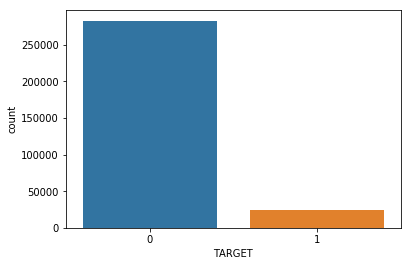

In [9]:
sns.countplot(x="TARGET", data=df_application)
plt.show()

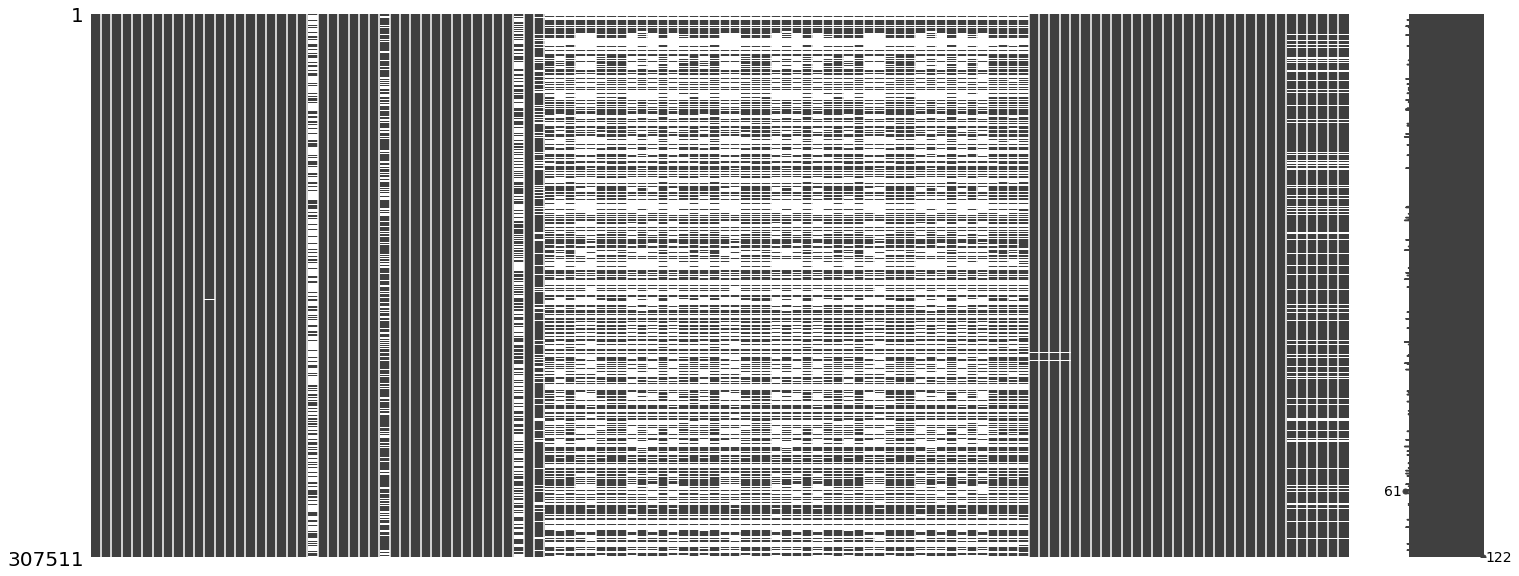

In [7]:
#【外観把握⑥】 欠損値の分布を確認
import missingno as msno
msno.matrix(df_application)

In [8]:
#【外観把握⑦】 欠損値の個数を確認
df_application.isnull().sum()[df_application.isnull().sum() != 0].sort_values(ascending=False)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_MODE           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MEDI                  208642
FLOORSMIN_MODE                  208642
YEARS_BUILD_AVG                 204488
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
OWN_CAR_AGE                     202929
LANDAREA_AVG                    182590
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
BASEMENTAREA_MODE               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MEDI               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_AVG               169682
NONLIVINGAREA_MODE       

In [10]:
print(24825 / 307511 * 100)
# 債務不履行は全体の8％

8.072881945686495


In [11]:
print(df_application.dropna(how='any', axis=1))

        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
5           100008       0         Cash loans           M            N   
6           100009       0         Cash loans           F            Y   
7           100010       0         Cash loans           M            Y   
8           100011       0         Cash loans           F            N   
9           100012       0    Revolving loans           M            N   
10          100014       0         Cash loans           F            N   
11          100015       0         Cash loans           F            N   
12          100016       0         Cas

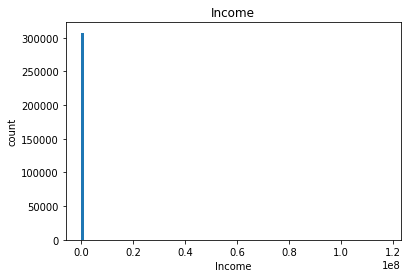

歪度： 391.56 です
尖度： 191783.44 です


In [246]:
#【外観把握⑧】 収入の分布を確認

import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots()

income_total = df_application['AMT_INCOME_TOTAL']
n, bins, patches = ax.hist(income_total, bins=100)

plt.ylabel("count")
plt.title("Income")
plt.xlabel("Income")
plt.show()

skew = scipy.stats.skew(income_total)
kurtosis = scipy.stats.kurtosis(income_total)

# 歪度
print('歪度：', '{:.2f}'.format(float(skew)), "です")
# 尖度
print('尖度：',  '{:.2f}'.format(float(kurtosis)), "です")

In [ ]:
可視化結果の考察：10万ドル未満のゾーンにほぼ入っている。
ネクストアクション ：相対度数の高いデータにフォーカスしてより詳細を見たいので、0.0〜0.1億ドルのデータに絞って分布を確認する。

In [247]:
#まず、外れ値を確認するために昇順にしてデータを見てみる
income_total_s = income_total.sort_values(ascending=False)
income_total_s
#上位５つが特に大きい外れ値であることが分かる

12840     117000000.0
203693     18000090.0
246858     13500000.0
77768       9000000.0
131127      6750000.0
204564      4500000.0
103006      4500000.0
187833      4500000.0
287463      4500000.0
181698      3950059.5
20216       3825000.0
49645       3600000.0
284311      3600000.0
82846       3375000.0
86026       3375000.0
248159      3150000.0
101007      3150000.0
107926      2930026.5
258773      2700000.0
298082      2475000.0
145673      2250000.0
201855      2250000.0
206814      2250000.0
278212      2250000.0
10222       2250000.0
55329       2250000.0
81185       2250000.0
71637       2250000.0
74781       2250000.0
29737       2250000.0
             ...     
293194        27000.0
36856         27000.0
199006        27000.0
239654        27000.0
162772        27000.0
205513        27000.0
299307        27000.0
133737        27000.0
163569        27000.0
232535        27000.0
277924        27000.0
90900         27000.0
267037        27000.0
83674         27000.0
173546    

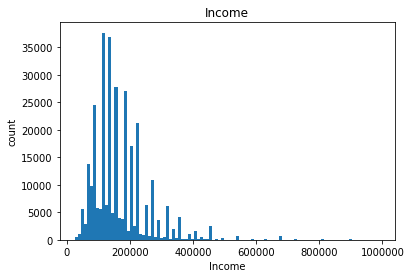

歪度： 2.14 です
尖度： 8.65 です


In [248]:
income_total_mode = income_total_s[income_total_s<1000000]

fig,ax = plt.subplots()
n, bins, patches = ax.hist(income_total_mode , bins=100)

plt.ylabel("count")
plt.title("Income")
plt.xlabel("Income")
plt.show()

skew = scipy.stats.skew(income_total_mode)
kurtosis = scipy.stats.kurtosis(income_total_mode)
print('歪度：', '{:.2f}'.format(float(skew)), "です")
print('尖度：',  '{:.2f}'.format(float(kurtosis)), "です")

In [ ]:
【外観把握⑨】
可視化結果の考察：3万ドル未満のゾーンにほぼ入っている。（ローンを組んでいる人たちは）イメージしていたより貧富の差は大きくない。
ネクストアクション ：ローンを組んでいる人の性別の分布を見る。（中国は男性が家を買ってからプロポーズすると聞くので、ほぼ男性なのではと思う）

In [86]:
gender = df_application['CODE_GENDER']
gender_count = pd.Series.value_counts(gender)
gender_count

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

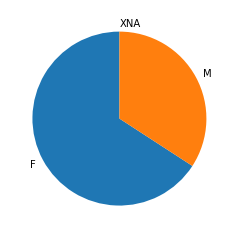

In [92]:
labels = ['F', 'M', 'XNA']
fig, ax = plt.subplots()
ax.pie(gender_count, labels=labels, startangle=90)
plt.show()

In [ ]:
【外観把握⑩】
可視化結果の考察：女性と男性の割合が2:1だという意外な結果だった。私の持っていた情報はフェイクだったのか…。
ネクストアクション ：ローンを組んでいる人の性別の分布を見る。（中国は男性が家を買ってからプロポーズすると聞くので、ほぼ男性なのではと思う）

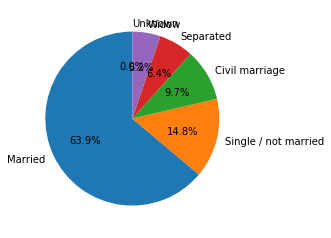

In [119]:
family = df_application['NAME_FAMILY_STATUS']
family_count = pd.Series.value_counts(family)
family_count_labels = list(family_count.index)
fig, ax = plt.subplots()
ax.pie(family_count, labels=family_count_labels, startangle=90, autopct="%1.1f%%")
plt.show()

In [ ]:
【外観把握11】
可視化結果の考察：独身でローンを組んで家を買う人は15%とのことで、私の持っていた情報はフェイクもしくは、分母を「ローンを組んだ人」のみにすると当てはまらないようだ。
　　　　　　　　 civilmarriageが10%ということはMarriedが63.9%ということは、結婚に届出が必須ではないのか？！届出と返済率の相関も気になる。
ネクストアクション ：同様の手法で、車の所有、学歴、子供の数、職業についても確認してデータの外観を知る。

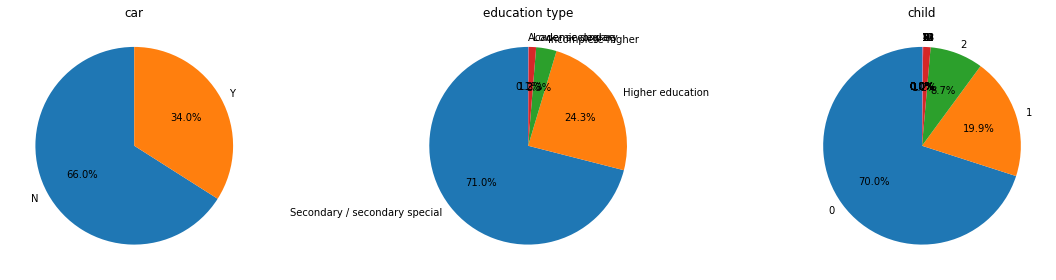

In [190]:
plt.figure(figsize=(20,10))

plt.subplot(2, 3, 1)
plt.title("car")
car = df_application['FLAG_OWN_CAR']
car_count = pd.Series.value_counts(car)
car_count_labels = list(car_count.index)
plt.pie(car_count, labels=car_count_labels, startangle=90, autopct="%1.1f%%")

plt.subplot(2, 3, 2)
plt.title("education type")
education = df_application['NAME_EDUCATION_TYPE']
education_count = pd.Series.value_counts(education)
education_count_labels = list(education_count.index)
plt.pie(education_count, labels=education_count_labels, startangle=90, autopct="%1.1f%%")

plt.subplot(2, 3, 3)
plt.title("child")
child = df_application['CNT_CHILDREN']
child_count = pd.Series.value_counts(child)
child_count_labels = list(child_count.index)
plt.pie(child_count, labels=child_count_labels, startangle=90, autopct="%1.1f%%")

plt.show()

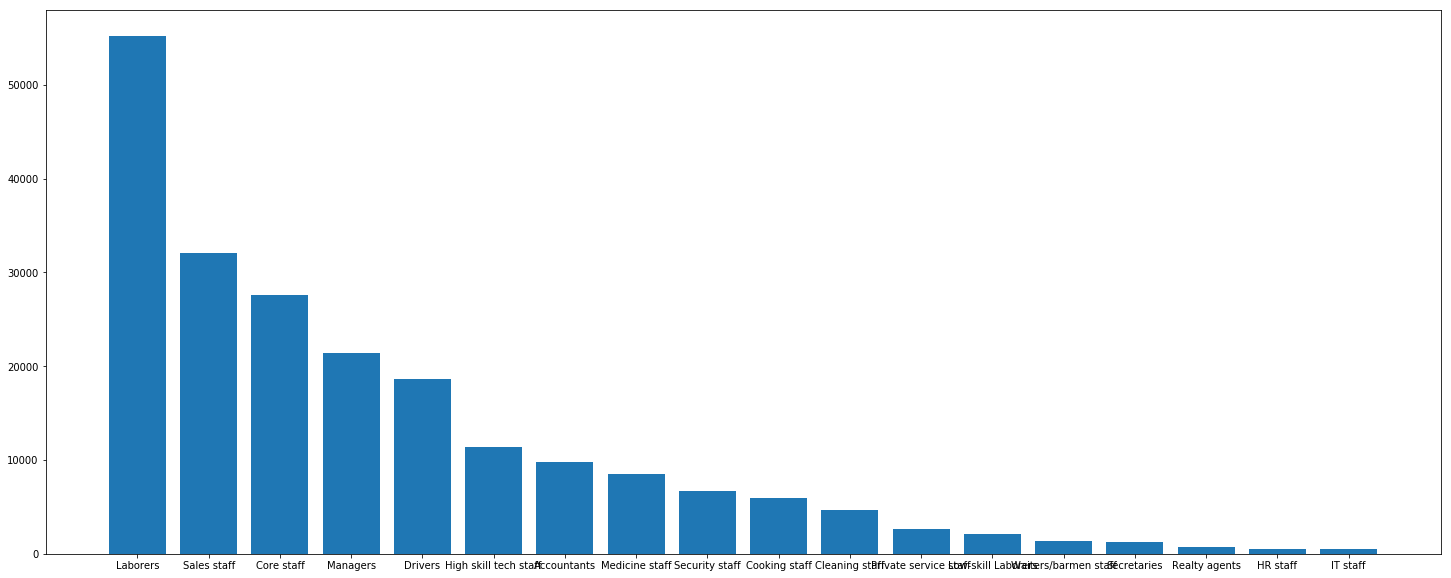

In [249]:
plt.figure(figsize=(25,10))

job = df_application['OCCUPATION_TYPE']
job_count = pd.Series.value_counts(job)
job_count_labels = list(job_count.index)
plt.bar(job_count_labels, job_count)

plt.show()

## 【問題3】課題設定

データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

・債務不履行が8%あるのは、感覚的に高過ぎる気がする。現代の日本で通常考えられるような要因以外のものがあるのではないか？
・75%を占める子供の人数が1人の世帯と、それ以外ので何らかの差があるか調べたい。（一人っ子政策によるペナルティの影響の有無があるのでは？）
・地域差があるのではないか？地域による３段階評価の、指標値としての有意性も確認しておきたい
・性別、学歴、収入、車の所有、住所に関するフラグ系の指標は、一応相関を調べておく
・申込時の同行者は連帯保証人である可能性が高そうなので、相関があるかもしれない
・収入に対する返済額の大きさ（総額、年額）は確認しておきたい
・職場の連絡先を登録した場合は、職場へ連絡されることへの警戒心が債務不履行への抑止力になるのでは？

## 【問題4】データ探索

問題3で設定した課題・疑問を解決するためにデータ探索を進めましょう。過程で新しい疑問点などが生まれた場合は、加えていってください。
課題合格の条件として、表やグラフを 合計15個以上 出力してください。そして、それに対してマークダウンを使い考察を加えていきましょう。

In [ ]:
【EDA①】
収入と債務不履行に相関があるか確認する

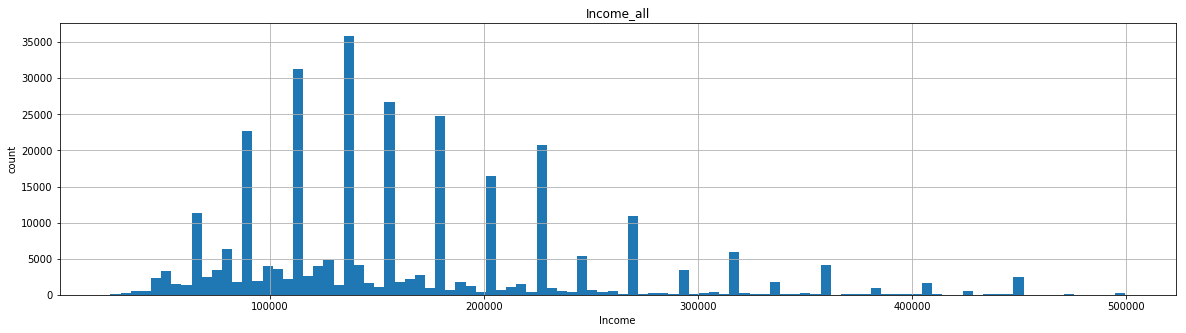

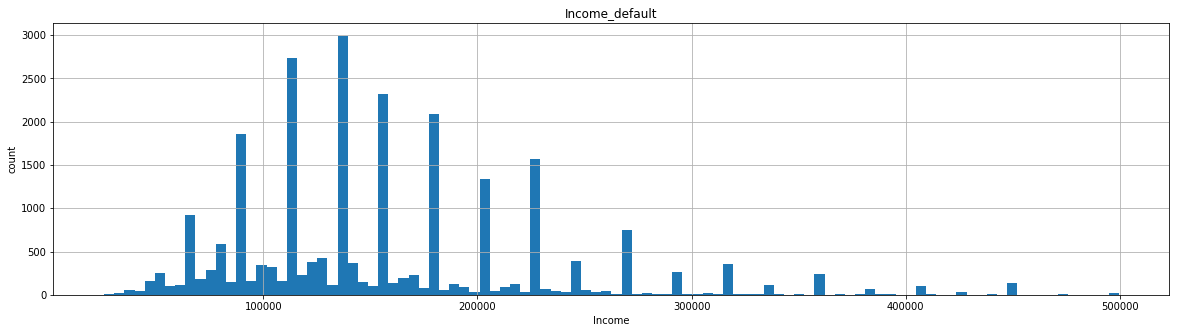

In [256]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,5

#全データの収入分布グラフ

income_total = df_application['AMT_INCOME_TOTAL']
income_middle = income_total[income_total_s<500000]

fig,ax = plt.subplots()
n, bins, patches = ax.hist(income_middle , bins=100)

plt.ylabel("count")
plt.title("Income_all")
plt.xlabel("Income")
plt.grid(True)
plt.show()

#債務不履行のフラグが立っているデータの収入分布グラフ

Target1_income = df_application[df_application['TARGET'] == 1 ]
Target1_income_middle = Target1_income[Target1_income['AMT_INCOME_TOTAL'] < 500000]
Target1_income_graph = Target1_income_middle['AMT_INCOME_TOTAL']

fig,ax = plt.subplots()
n, bins, patches = ax.hist(Target1_income_graph , bins=100)

plt.ylabel("count")
plt.title("Income_default")
plt.xlabel("Income")
plt.grid(True)

plt.show()

In [ ]:
【EDA①の考察】
収入額の分布は、全体と債務不履行の人で目立った違いは無いため、収入額と返済可否は直接の相関は無いようだ。

【EDA②】
ローンの総額と債務不履行に相関があるか確認する

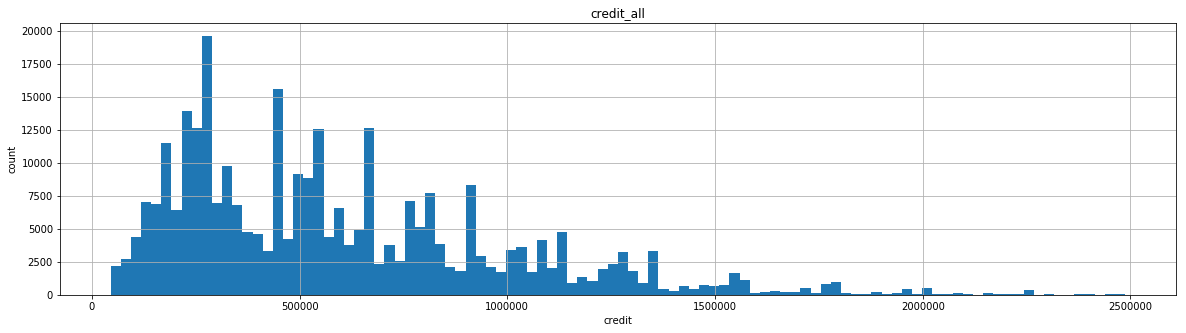

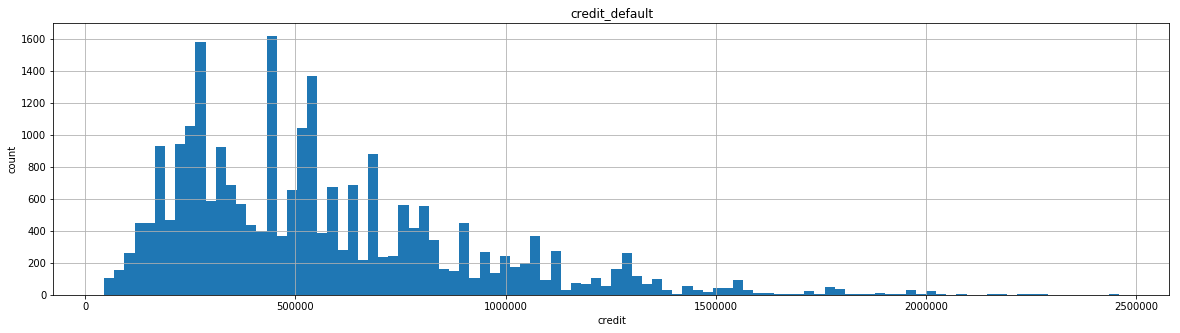

In [262]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,5

#全データの収入分布グラフ

credit = df_application['AMT_CREDIT']
credit_middle = credit[credit<2500000]

fig,ax = plt.subplots()
n, bins, patches = ax.hist(credit_middle , bins=100)

plt.ylabel("count")
plt.title("credit_all")
plt.xlabel("credit")
plt.grid(True)
plt.show()

#債務不履行のフラグが立っているデータの収入分布グラフ

Target1_credit = df_application[df_application['TARGET'] == 1 ]
Target1_credit_middle = Target1_credit[Target1_credit['AMT_CREDIT'] < 2500000]
Target1_credit_graph = Target1_credit_middle['AMT_CREDIT']

fig,ax = plt.subplots()
n, bins, patches = ax.hist(Target1_credit_graph , bins=100)

plt.ylabel("count")
plt.title("credit_default")
plt.xlabel("credit")
plt.grid(True)

plt.show()


In [ ]:
【EDA②の考察】
ローンの総額の分布は、全体と債務不履行の人で目立った違いは無いため、ローンの総額と返済可否は直接の相関は無いようだ。

【EDA③】
年収に対するローンの返済年金額と返済率の相関を確認する。

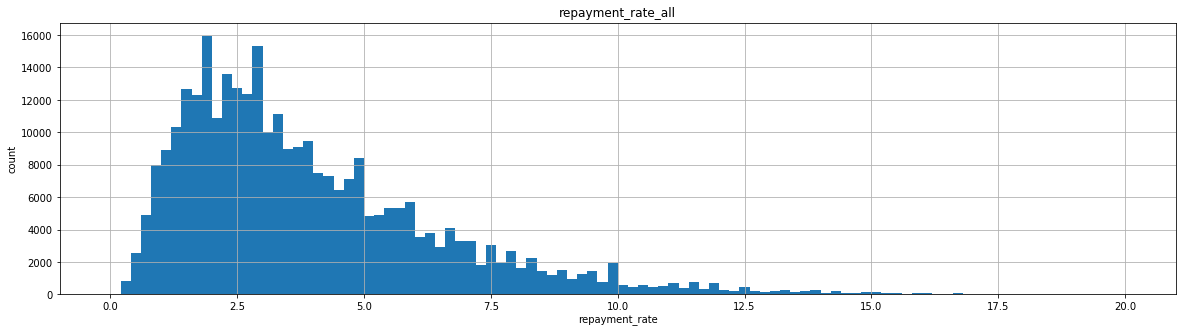

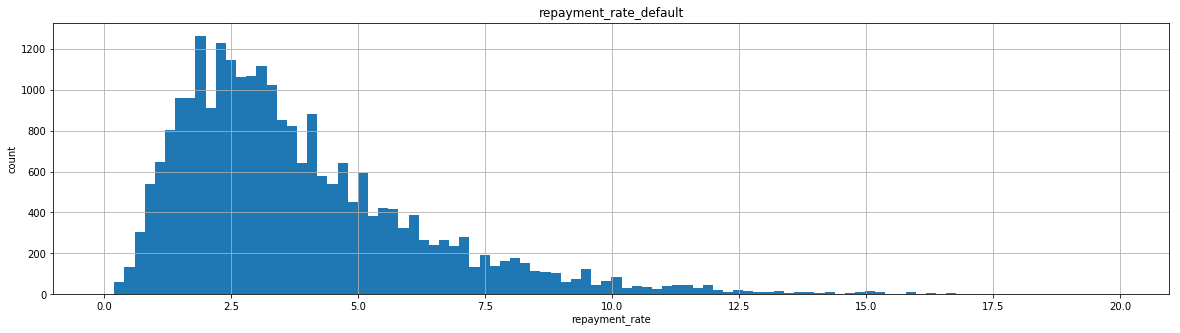

In [52]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,5

#全データの年収に対する返済額の割合のグラフ

repayment_rate = df_application[['AMT_CREDIT', 'AMT_INCOME_TOTAL']]
repayment_rate = repayment_rate['AMT_CREDIT'] / repayment_rate['AMT_INCOME_TOTAL']
repayment_rate_middle = repayment_rate[repayment_rate < 20]

fig,ax = plt.subplots()
n, bins, patches = ax.hist(repayment_rate_middle, bins=100)

plt.ylabel("count")
plt.title("repayment_rate_all")
plt.xlabel("repayment_rate")
plt.grid(True)
plt.show()

# 債務不履行のフラグが立っているデータの、年収に対する返済額の割合のグラフ

Target1_repayment_rate = df_application[df_application['TARGET'] == 1 ]
Target1_repayment_rate = Target1_repayment_rate['AMT_CREDIT'] / Target1_repayment_rate['AMT_INCOME_TOTAL']
Target1_repayment_rate_middle = Target1_repayment_rate[Target1_repayment_rate < 20]

fig,ax = plt.subplots()
n, bins, patches = ax.hist(Target1_repayment_rate_middle , bins=100)

plt.ylabel("count")
plt.title("repayment_rate_default")
plt.xlabel("repayment_rate")
plt.grid(True)

plt.show()

In [ ]:
【EDA③の考察】
年収に対する返済額の割合の分布は、全体と債務不履行の人で目立った違いは無いため、ここにも直接の相関は無いようだ。

【EDA④】
車の所有、学歴、子供の数、職業、加えて居住状況も気になるので、その返済率を確認してみる。

  FLAG_OWN_CAR     SK_ID_CURR    TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0            N  278090.776133  8.500227      0.364161     154603.326933   
1            Y  278354.640558  7.243730      0.519673     196338.851352   

      AMT_CREDIT   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
0  565442.540961  25635.303918    506464.376570                    0.020458   
1  664186.007950  29967.028169    600266.782129                    0.021664   

     DAYS_BIRTH             ...              FLAG_DOCUMENT_18  \
0 -16443.900707             ...                      0.008136   
1 -15247.500005             ...                      0.008118   

   FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
0          0.000557          0.000389          0.000246   
1          0.000669          0.000736          0.000507   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                    0.006239                   0.006954   
1                    0.006709             

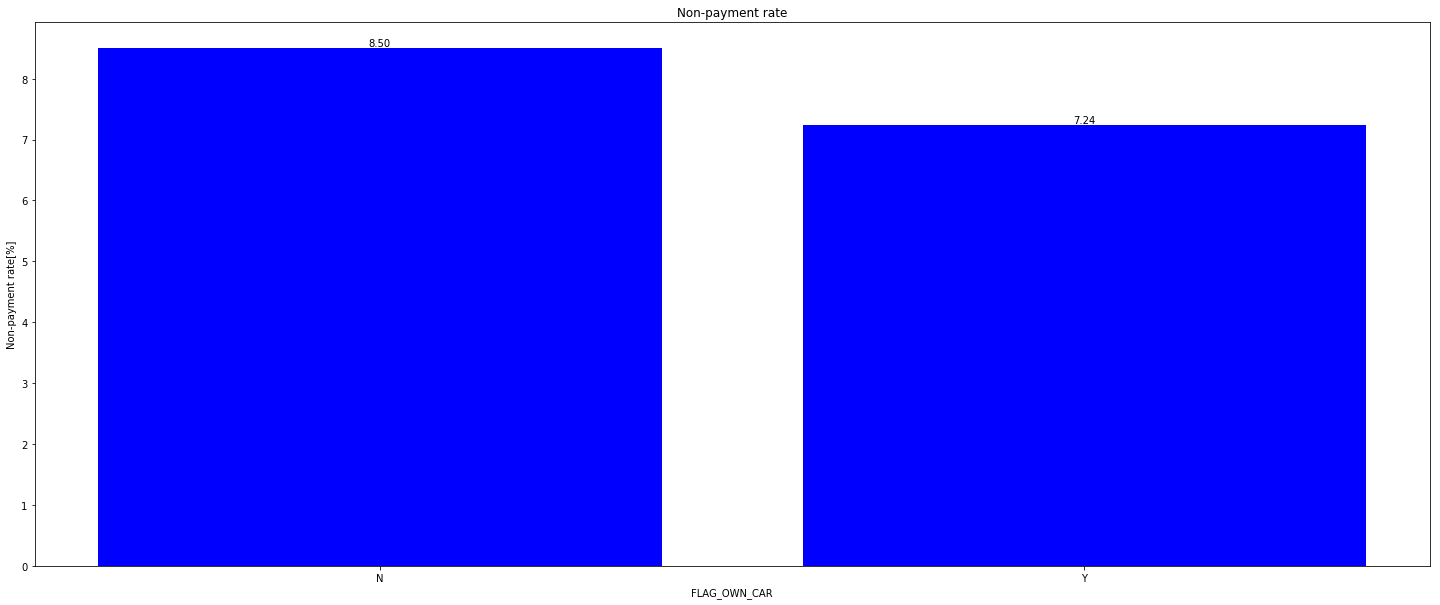

In [64]:
#車の所有状況ごとに返済率を算出
non_repayment_rate_w_occupation = df_application.groupby("FLAG_OWN_CAR", as_index=False).mean()
non_repayment_rate_w_occupation["TARGET"] *= 100
#non_repayment_rate_w_occupation["OCCUPATION_TYPE_LABEL"] = [i for i in range(0, len(non_repayment_rate_w_occupation))]
print(non_repayment_rate_w_occupation)

#Bar plot
plt.figure(figsize=(25,10))
plt.bar(non_repayment_rate_w_occupation.index, non_repayment_rate_w_occupation["TARGET"], color="Blue")
plt.xlabel("FLAG_OWN_CAR")
plt.ylabel("Non-payment rate[%]")
plt.title("Non-payment rate")
#グラフ上に数値表示
for x, y in zip(non_repayment_rate_w_occupation.index, non_repayment_rate_w_occupation["TARGET"]):
    plt.text(x, y, str("{:.2f}").format(y), ha='center', va='bottom')

plt.xticks(non_repayment_rate_w_occupation.index, non_repayment_rate_w_occupation["FLAG_OWN_CAR"]) #x軸を実際のデータラベルへ置き換え
plt.show()

             NAME_EDUCATION_TYPE     SK_ID_CURR     TARGET  CNT_CHILDREN  \
0                Academic degree  282783.128049   1.829268      0.378049   
1               Higher education  278090.736065   5.355115      0.459893   
2              Incomplete higher  279772.472609   8.484966      0.440401   
3                Lower secondary  279792.386268  10.927673      0.355870   
4  Secondary / secondary special  278104.760700   8.939929      0.402365   

   AMT_INCOME_TOTAL     AMT_CREDIT   AMT_ANNUITY  AMT_GOODS_PRICE  \
0     240009.146341  723515.625000  32490.576220    663118.902439   
1     208652.053814  689950.456100  30803.771588    630312.415920   
2     181563.812397  566730.559161  27277.146750    511996.416723   
3     130079.358491  489748.561321  22699.948624    430405.220299   
4     155158.512138  571193.392454  25906.980834    509922.132881   

   REGION_POPULATION_RELATIVE    DAYS_BIRTH             ...              \
0                    0.025019 -16230.518293          

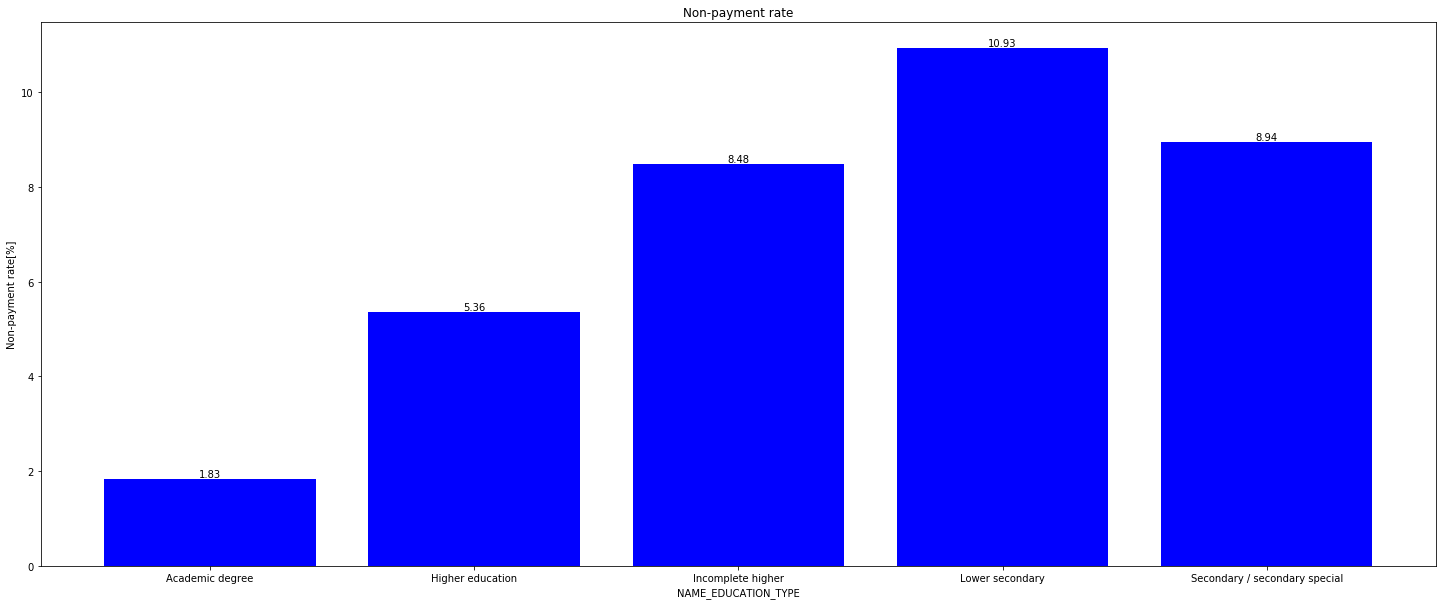

In [65]:
#学歴ごとに返済率を算出
non_repayment_rate_w_occupation = df_application.groupby("NAME_EDUCATION_TYPE", as_index=False).mean()
non_repayment_rate_w_occupation["TARGET"] *= 100
#non_repayment_rate_w_occupation["OCCUPATION_TYPE_LABEL"] = [i for i in range(0, len(non_repayment_rate_w_occupation))]
print(non_repayment_rate_w_occupation)

#Bar plot
plt.figure(figsize=(25,10))
plt.bar(non_repayment_rate_w_occupation.index, non_repayment_rate_w_occupation["TARGET"], color="Blue")
plt.xlabel("NAME_EDUCATION_TYPE")
plt.ylabel("Non-payment rate[%]")
plt.title("Non-payment rate")
#グラフ上に数値表示
for x, y in zip(non_repayment_rate_w_occupation.index, non_repayment_rate_w_occupation["TARGET"]):
    plt.text(x, y, str("{:.2f}").format(y), ha='center', va='bottom')

plt.xticks(non_repayment_rate_w_occupation.index, non_repayment_rate_w_occupation["NAME_EDUCATION_TYPE"]) #x軸を実際のデータラベルへ置き換え
plt.show()

    CNT_CHILDREN     SK_ID_CURR      TARGET  AMT_INCOME_TOTAL    AMT_CREDIT  \
0              0  278241.087440    7.711809     166288.713566  5.991030e+05   
1              1  277874.907917    8.923575     175664.465567  5.956403e+05   
2              2  278910.119780    8.721821     172580.748737  6.048271e+05   
3              3  275570.381759    9.631423     173948.262712  6.078956e+05   
4              4  272406.734266   12.820513     170023.426573  6.182227e+05   
5              5  263936.702381    8.333333     177780.000000  5.714609e+05   
6              6  254632.047619   28.571429     144107.142857  5.237361e+05   
7              7  281302.285714    0.000000     136928.571429  4.579444e+05   
8              8  196781.000000    0.000000     108000.000000  4.975200e+05   
9              9  274260.500000  100.000000     225000.000000  5.832855e+05   
10            10  285179.500000    0.000000      67500.000000  1.049085e+05   
11            11  140032.000000  100.000000     3150

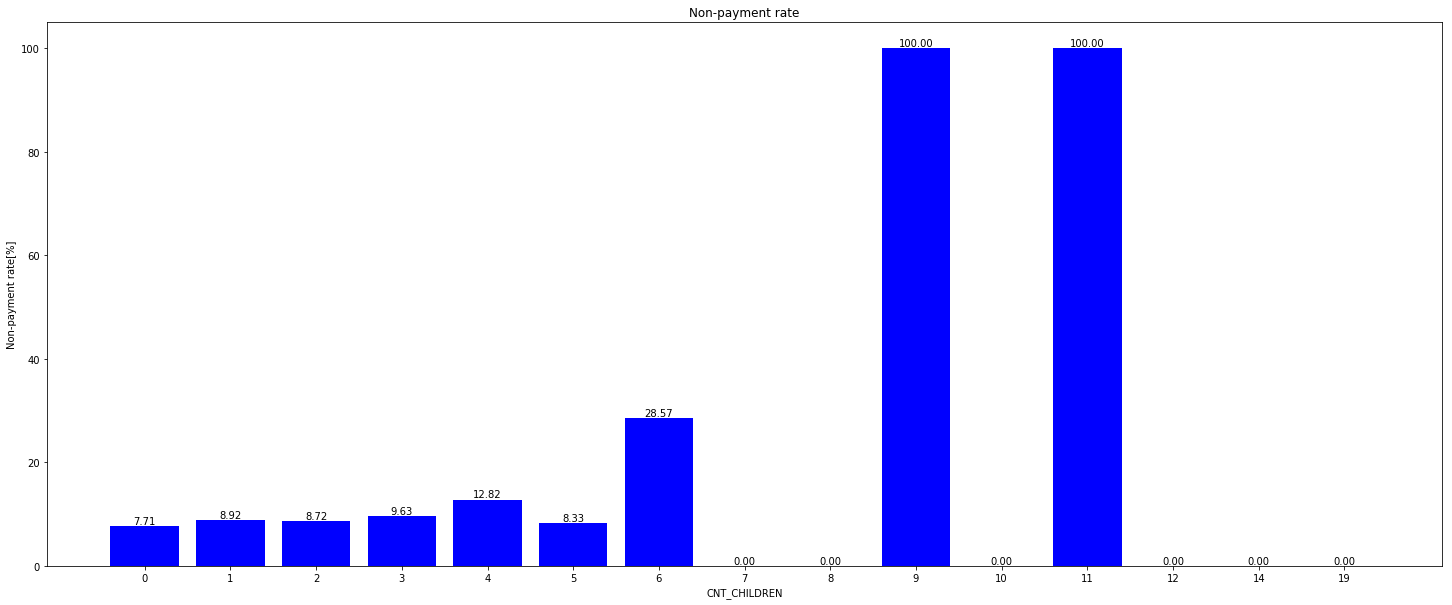

In [66]:
#子供の数ごとに返済率を算出
non_repayment_rate_w_occupation = df_application.groupby("CNT_CHILDREN", as_index=False).mean()
non_repayment_rate_w_occupation["TARGET"] *= 100
#non_repayment_rate_w_occupation["OCCUPATION_TYPE_LABEL"] = [i for i in range(0, len(non_repayment_rate_w_occupation))]
print(non_repayment_rate_w_occupation)

#Bar plot
plt.figure(figsize=(25,10))
plt.bar(non_repayment_rate_w_occupation.index, non_repayment_rate_w_occupation["TARGET"], color="Blue")
plt.xlabel("CNT_CHILDREN")
plt.ylabel("Non-payment rate[%]")
plt.title("Non-payment rate")
#グラフ上に数値表示
for x, y in zip(non_repayment_rate_w_occupation.index, non_repayment_rate_w_occupation["TARGET"]):
    plt.text(x, y, str("{:.2f}").format(y), ha='center', va='bottom')

plt.xticks(non_repayment_rate_w_occupation.index, non_repayment_rate_w_occupation["CNT_CHILDREN"]) #x軸を実際のデータラベルへ置き換え
plt.show()

          OCCUPATION_TYPE     SK_ID_CURR     TARGET  CNT_CHILDREN  \
0             Accountants  277197.344645   4.830327      0.488536   
1          Cleaning staff  279890.247797   9.606705      0.363421   
2           Cooking staff  277249.663808  10.443996      0.483855   
3              Core staff  277981.296264   6.303954      0.558070   
4                 Drivers  278369.686610  11.326130      0.511853   
5                HR staff  277838.827709   6.394316      0.440497   
6   High skill tech staff  279163.345782   6.159930      0.473989   
7                IT staff  280464.347909   6.463878      0.397338   
8                Laborers  277951.000979  10.578770      0.511742   
9      Low-skill Laborers  277323.944099  17.152413      0.460105   
10               Managers  278557.399139   6.214028      0.509522   
11         Medicine staff  276504.129085   6.700246      0.500996   
12  Private service staff  277683.879336   6.598793      0.514329   
13          Realty agents  281014.

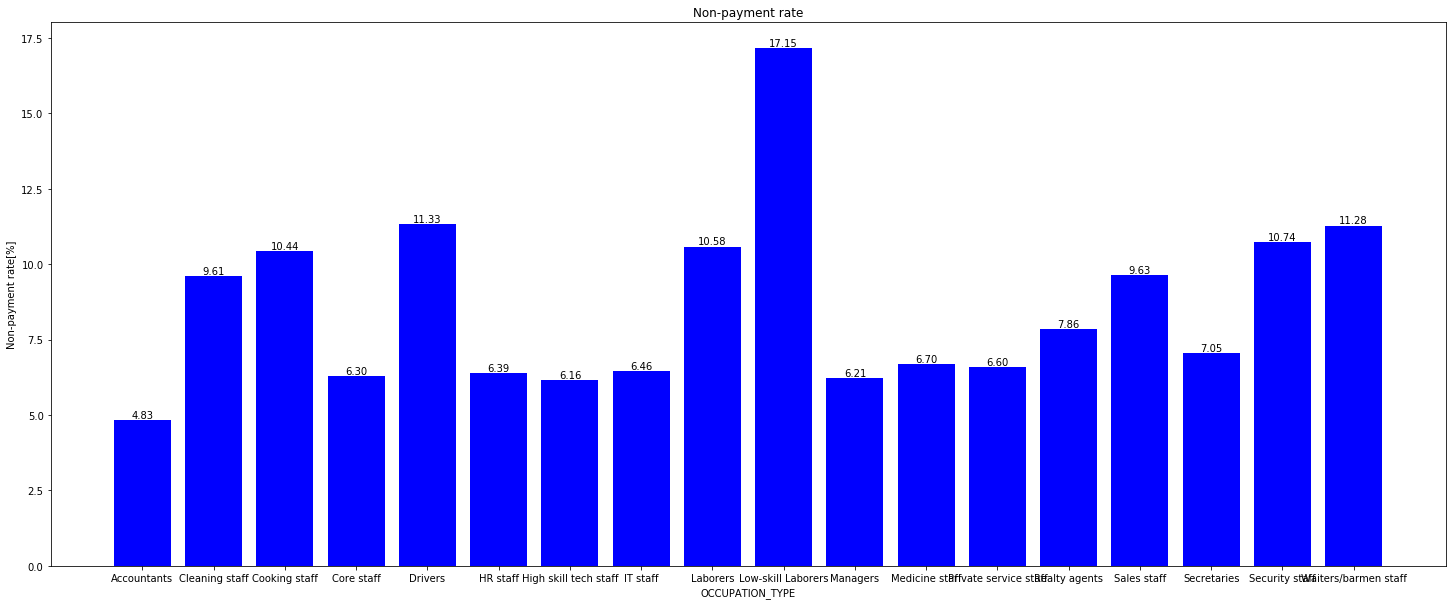

In [59]:
#職業ごとに返済率を算出
non_repayment_rate_w_occupation = df_application.groupby("OCCUPATION_TYPE", as_index=False).mean()
non_repayment_rate_w_occupation["TARGET"] *= 100
#non_repayment_rate_w_occupation["OCCUPATION_TYPE_LABEL"] = [i for i in range(0, len(non_repayment_rate_w_occupation))]
print(non_repayment_rate_w_occupation)

#Bar plot
plt.figure(figsize=(25,10))
plt.bar(non_repayment_rate_w_occupation.index, non_repayment_rate_w_occupation["TARGET"], color="Blue")
plt.xlabel("OCCUPATION_TYPE")
plt.ylabel("Non-payment rate[%]")
plt.title("Non-payment rate")

#グラフ上に数値表示
for x, y in zip(non_repayment_rate_w_occupation.index, non_repayment_rate_w_occupation["TARGET"]):
    plt.text(x, y, str("{:.2f}").format(y), ha='center', va='bottom')

plt.xticks(non_repayment_rate_w_occupation.index, non_repayment_rate_w_occupation["OCCUPATION_TYPE"]) #x軸を実際のデータラベルへ置き換え
plt.show()

     NAME_HOUSING_TYPE     SK_ID_CURR     TARGET  CNT_CHILDREN  \
0      Co-op apartment  278765.719251   7.932264      0.533868   
1    House / apartment  278111.896254   7.795711      0.411719   
2  Municipal apartment  277890.198694   8.539748      0.407494   
3     Office apartment  278482.433703   6.572411      0.521972   
4     Rented apartment  281031.256915  12.313051      0.487810   
5         With parents  278625.958086  11.698113      0.471698   

   AMT_INCOME_TOTAL     AMT_CREDIT   AMT_ANNUITY  AMT_GOODS_PRICE  \
0     167651.322193  579700.696524  26932.267380    523209.375000   
1     169227.717311  605169.318500  27243.937345    544424.295919   
2     168002.934007  599576.729321  26956.190395    529643.080333   
3     187906.542988  626230.575086  28446.609859    562619.863480   
4     167460.213891  525562.492624  25895.237090    470120.409967   
5     158651.069555  506478.160916  24910.879549    453444.967380   

   REGION_POPULATION_RELATIVE    DAYS_BIRTH          

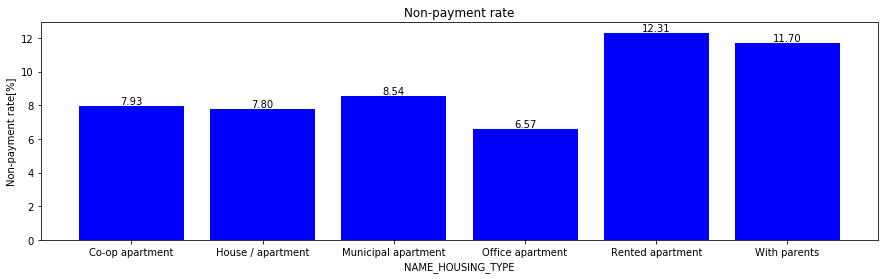

In [63]:
#居住状況毎に返済率を算出
non_repayment_rate_w_housing_type = df_application.groupby("NAME_HOUSING_TYPE", as_index=False).mean()
non_repayment_rate_w_housing_type["TARGET"] *= 100
print(non_repayment_rate_w_housing_type)

#Bar plot
plt.figure(figsize=(15,4))
plt.bar(non_repayment_rate_w_housing_type.index, non_repayment_rate_w_housing_type["TARGET"], color="Blue")
plt.xlabel("NAME_HOUSING_TYPE")
plt.ylabel("Non-payment rate[%]")
plt.title("Non-payment rate")
#グラフ上に数値表示
for x, y in zip(non_repayment_rate_w_housing_type.index, non_repayment_rate_w_housing_type["TARGET"]):
    plt.text(x, y, str("{:.2f}").format(y), ha='center', va='bottom')

plt.xticks(non_repayment_rate_w_housing_type.index, non_repayment_rate_w_housing_type["NAME_HOUSING_TYPE"]) #x軸を実際のデータラベルへ置き換え
plt.show()

【EDA④の考察】
車の所有:相関はほぼ見られない
学歴:低学歴の方がDefault率が高くなるという明確な相関が見られる
子供の数:子供の数が増えるとDefault率が高くなるように見えるが、数が増えるとサンプル数が極端に減るという前提があるので有効な特徴量とは言えない
職業:Low skill laborはDefault率が突出して高く、他にもDriverなど高いスキルを必要としない職業については高い傾向がある
居住状況:Rented Apartment、With parentsはDefault率が高め

【EDA⑤】
主観で気になったパラメータをピックアップしていくと偏りがある可能性があるので、全パラメータについて重要度の算出を行なって有意義な説明変数を見つけ出す→下記の感じでやりたかったが、うまくできなかったので今後の自分の成長に期待してこの課題はここで諦める

In [67]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [79]:
#オブジェクト型データの尺度確認とエンコーディング
object_data_home_credit = df_application.select_dtypes(['object'])
#data_home_credit.head()
#data_home_credit.info()
object_data_home_credit.head()
object_col_name = object_data_home_credit.columns.values
array_object_to_int = np.array([object_data_home_credit[object_col_name[i]].unique() for i in range(0,len(object_col_name))])

In [81]:
#オブジェクト型を数値に置き換え
for i in range(0,len(array_object_to_int)):
    for n in range(0,len(array_object_to_int[i])):
        df_application_noobjyect = df_application.replace(array_object_to_int[i][n], n)

In [82]:
#ランダムフォレストを使って各パラメータの重要度を調べる
target = df_application['TARGET']
feature = df_application.iloc[:,1:len(df_application.columns)]
model.fit(feature, target)
"""
print("  特徴量   :   重要度")
for i in range(0, len(feature.columns.values)):
               print("{} : {:.3f}".format(feature.columns.values[i], model.feature_importances_[i]))
"""

ValueError: could not convert string to float: 'Working'

In [73]:
rank = np.argsort(-model.feature_importances_)
f, ax = plt.subplots(figsize=(11, 11)) 
sb.barplot(x=model.feature_importances_[rank], y=data_home_credit.columns.values[rank], orient='h')
ax.set_xlabel("Importance")
plt.tight_layout()
plt.show()

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [76]:
#上位10個の特徴量を抽出
for i in range(0, 10):
    print("Rank{} => {} (Importance={:.3f})".format(i+1, df_application.columns.values[rank[i]], model.feature_importances_[rank[i]]))

NameError: name 'rank' is not defined

## 【問題5】（アドバンス課題）カーネルへの投稿

In [ ]:
Kaggleのカーネルに今回行ったEDAを投稿してみましょう。英語の文章を書くことが難しい場合は、機械翻訳サービスを活用するなどでも構いません。